In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import json
sns.set_palette('Dark2')
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv(r'C:\Users\uset\Desktop\Youtube_Analysis\CAvideos.csv')
open_file = open(r'C:\Users\uset\Desktop\Youtube_Analysis\CA_category_id.json')
df_category_json = json.load(open_file)

In [19]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [20]:
print('The type of the json file is: {}'.format(type(df_category_json)))

The type of the json file is: <class 'dict'>


In [21]:
print("We would be reading a few values present in the json dictionary file")
print("\n")
df_category_json['kind']

We would be reading a few values present in the json dictionary file




'youtube#videoCategoryListResponse'

In [22]:
type(df_category_json['items'])

list

In [23]:
print("The total number of items that are present in the json file are {}".format(len(df_category_json['items'])))

The total number of items that are present in the json file are 31


In [24]:
print("The total number of unique category IDs present in our data are: {}".format(df['category_id'].nunique()))

The total number of unique category IDs present in our data are: 17


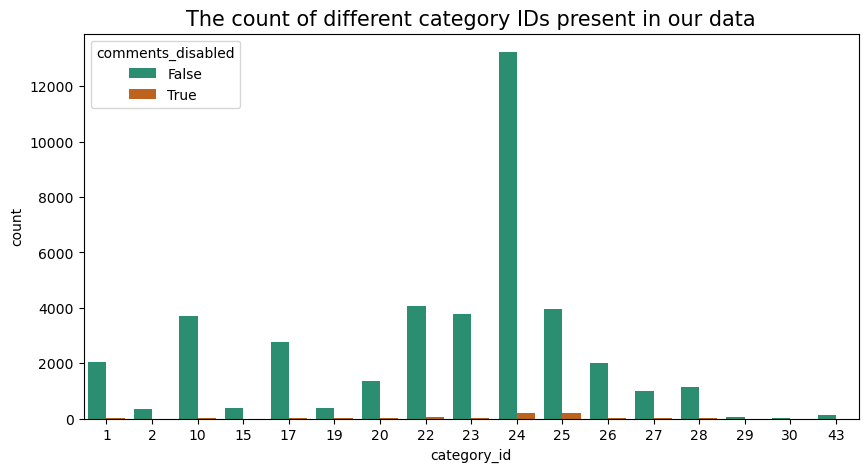

In [25]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'category_id', hue = 'comments_disabled', data = df)
plt.title("The count of different category IDs present in our data", fontsize = 15)
plt.show()

In [26]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [27]:
print("The number of null values present in the description column: {}".format(df.isnull().sum()['description']))

The number of null values present in the description column: 1296


In [28]:
print("The length of the dataframe is: {}".format(len(df)))

The length of the dataframe is: 40881


In [29]:
df.dropna(inplace = True)
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [30]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [31]:
titles_dict = dict()

In [32]:
for i in range(len(df_category_json['items'])):
    print(df_category_json['items'][i]['id'])
    print(df_category_json['items'][i]['snippet']['title'])
    id_number = int(df_category_json['items'][i]['id'])
    category = df_category_json['items'][i]['snippet']['title']
    titles_dict[id_number] = category
               

1
Film & Animation
2
Autos & Vehicles
10
Music
15
Pets & Animals
17
Sports
18
Short Movies
19
Travel & Events
20
Gaming
21
Videoblogging
22
People & Blogs
23
Comedy
24
Entertainment
25
News & Politics
26
Howto & Style
27
Education
28
Science & Technology
30
Movies
31
Anime/Animation
32
Action/Adventure
33
Classics
34
Comedy
35
Documentary
36
Drama
37
Family
38
Foreign
39
Horror
40
Sci-Fi/Fantasy
41
Thriller
42
Shorts
43
Shows
44
Trailers


In [33]:
print(titles_dict)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [34]:
df['category'] = df['category_id'].map(titles_dict)

In [35]:
df.drop('category_id', axis = 1, inplace = True)

In [36]:
df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


In [37]:
df.drop('video_id', axis = 1, inplace = True)

In [38]:
df.drop('thumbnail_link', axis = 1, inplace = True)

In [39]:
df['ratings_disabled'].unique()


array([False,  True])

In [40]:
df['video_error_or_removed'].unique()

array([False,  True])

In [41]:
def true_false_converter(value):
    if value == True:
        return 1
    else:
        return 0

In [42]:
df.tail()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Entertainment
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False,► Retrouvez vos programmes préférés : https://...,Entertainment
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,News & Politics
40880,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...,Entertainment


In [43]:
df['tags'][0]

'Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap"'

In [44]:
df['tags'][1]

'plush|"bad unboxing"|"unboxing"|"fan mail"|"idubbbztv"|"idubbbztv2"|"things"|"best"|"packages"|"plushies"|"chontent chop"'

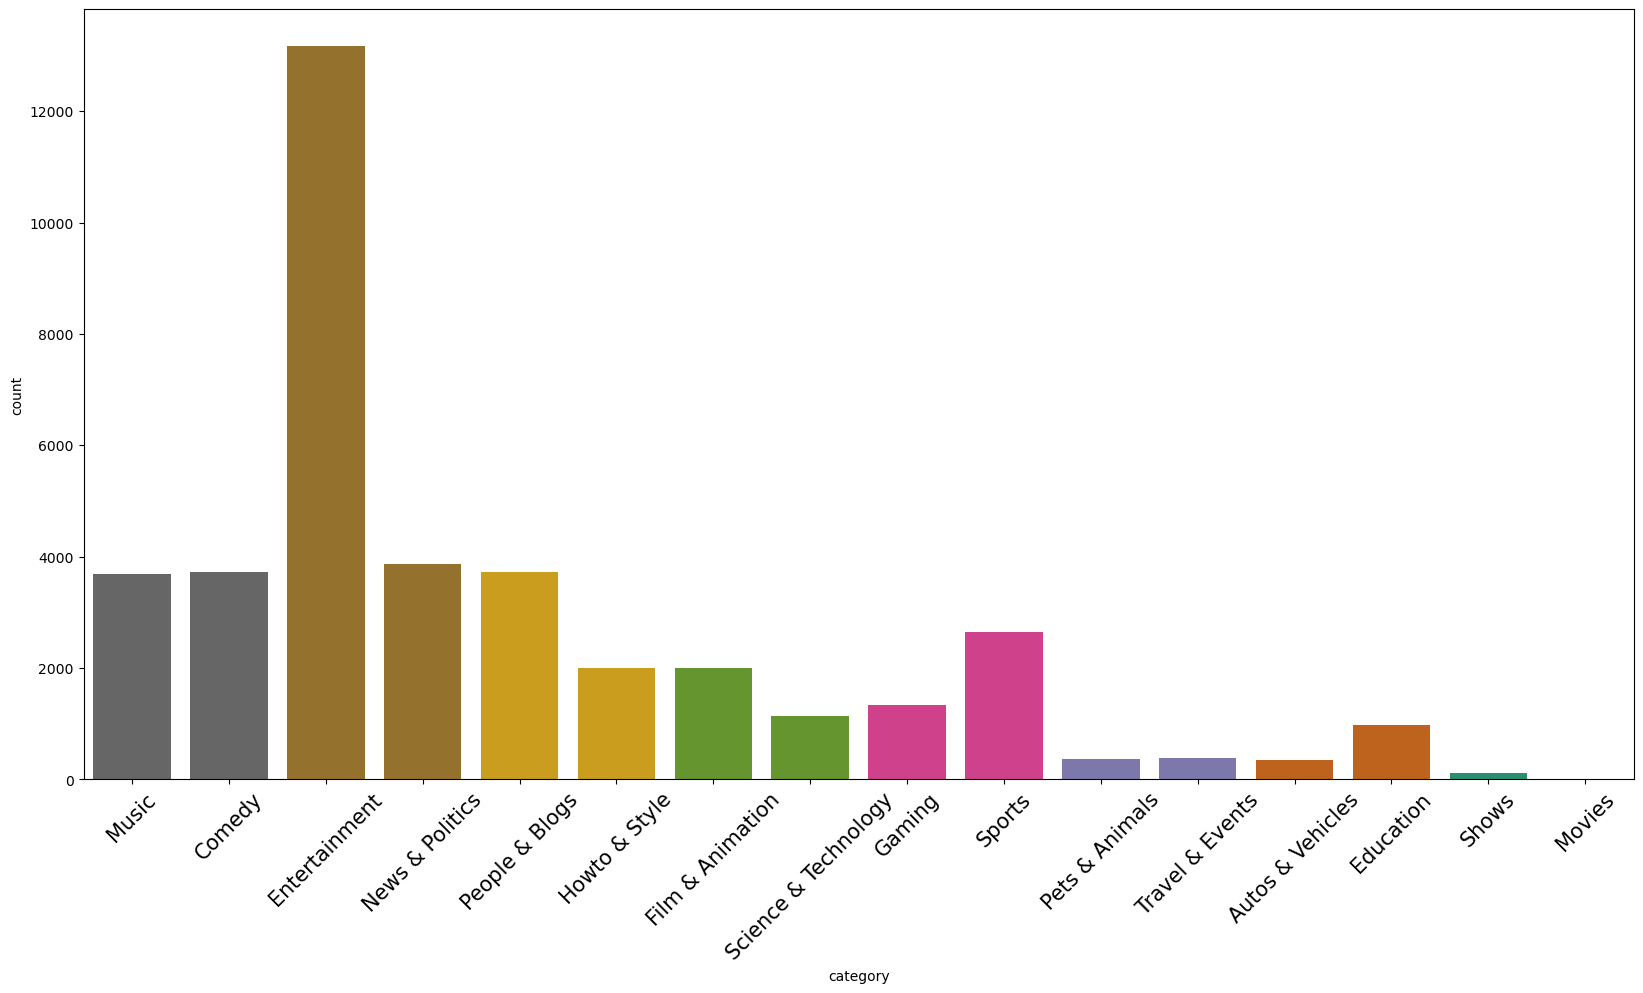

In [45]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(df['category'], palette = 'Dark2_r')
plt.show()

In [46]:
type(df['comments_disabled'][0])

numpy.bool_

In [47]:
df['comments_disabled'].unique()

array([False,  True])